# MCS 275 Spring 2022 - Example neural network (lecture 31)

In this notebook, we use `scikit-learn` to create a neural network to recognize images of hand-written digits.

We download a copy of a data set called "MNIST", which contains `28 x 28` pixel images of digits.

In [1]:
import matplotlib.pyplot as plt
import numpy as np

from sklearn.datasets import fetch_openml
from sklearn.neural_network import MLPClassifier

## Setting up the data set

In [2]:
# Import data set of 28 x 28 pixel images of hand-written digits (this data set is called "MNIST")
X, y = fetch_openml('mnist_784', version=1, return_X_y=True)
X = X / 256


# Take first 10k images for training
# Take next 10k images to test afterwards
X_train, X_test = X[:10_000], X[10_000:20_000]
y_train, y_test = y[:10_000], y[10_000:20_000]

In [8]:
print(X_train.head())

   pixel1  pixel2  pixel3  pixel4  pixel5  pixel6  pixel7  pixel8  pixel9  \
0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
1     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
2     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
3     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
4     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   

   pixel10  ...  pixel775  pixel776  pixel777  pixel778  pixel779  pixel780  \
0      0.0  ...       0.0       0.0       0.0       0.0       0.0       0.0   
1      0.0  ...       0.0       0.0       0.0       0.0       0.0       0.0   
2      0.0  ...       0.0       0.0       0.0       0.0       0.0       0.0   
3      0.0  ...       0.0       0.0       0.0       0.0       0.0       0.0   
4      0.0  ...       0.0       0.0       0.0       0.0       0.0       0.0   

   pixel781  pixel782  pixel783  pixel784  
0       0.0       

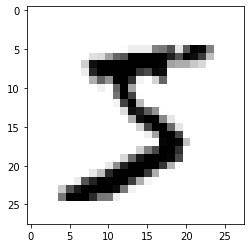

In [9]:
def display_digit(img):
    '''Take an image from our data set and display it'''
    img = img.values.reshape(28,28)
    plt.imshow(img, cmap = "gray_r")
    
    
img = X_train.iloc[0]
display_digit(img)

## Creating the neural network

In [10]:
# This is the neural network
# "MLP" stands for "multi-layer perceptron"

mlp = MLPClassifier(hidden_layer_sizes = (50,), solver = 'sgd', max_iter = 20, verbose = True, batch_size = 200)

The neural network will have 10 outputs, each corresponding to how much it "thinks" each digit is in the image

![title](images/l31-mnist-nn.png)



Image source: https://zitaoshen.rbind.io/project/machine_learning/how-to-build-your-own-neural-net-from-the-scrach/ (slightly edited)

In [11]:
# Train the neural network on the data set
mlp.fit(X_train, y_train)

Iteration 1, loss = 2.19789284
Iteration 2, loss = 1.88753565
Iteration 3, loss = 1.59275457
Iteration 4, loss = 1.34030497
Iteration 5, loss = 1.14662970
Iteration 6, loss = 1.00098521
Iteration 7, loss = 0.89201871
Iteration 8, loss = 0.80850062
Iteration 9, loss = 0.74335291
Iteration 10, loss = 0.69135861
Iteration 11, loss = 0.64910542
Iteration 12, loss = 0.61420176
Iteration 13, loss = 0.58497128
Iteration 14, loss = 0.56007951
Iteration 15, loss = 0.53848647
Iteration 16, loss = 0.51980741
Iteration 17, loss = 0.50313416
Iteration 18, loss = 0.48836820
Iteration 19, loss = 0.47551197
Iteration 20, loss = 0.46368211


C:\Users\Johnn\AppData\Roaming\Python\Python310\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20) reached and the optimization hasn't converged yet.
  warnings.warn(


MLPClassifier(batch_size=200, hidden_layer_sizes=(50,), max_iter=20,
              solver='sgd', verbose=True)

## Testing the neural network on data it has never seen before

To pick a different example, change the number in the first line (so that we choose a different row from `X_test`)

The neural network thinks this is a ['9']


C:\Users\Johnn\AppData\Roaming\Python\Python310\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPClassifier was fitted with feature names
  warnings.warn(


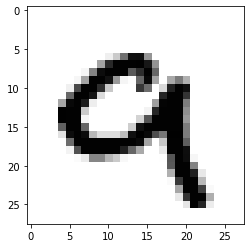

In [12]:
# Pick an image from our test set (never seen before by our neural network)
test_img = X_test.iloc[1300]

# Show it to us
display_digit(test_img)

# Change it from a pandas series to a NumPy array (and flip its dimensions)
test_img = test_img.values.reshape(1, -1)

# Ask the neural network what digit this is
prediction = mlp.predict(test_img)

print("The neural network thinks this is a {}".format(prediction))

# Extra: "Fashion MNIST"

This does the exact same thing as before, but now each image represents an article of clothing instead of a digit. The images are still `28 x 28` pixels. This data set is called "Fashion MNIST"

In [3]:
# Import the modules and data

import matplotlib.pyplot as plt
import numpy as np

from sklearn.datasets import fetch_openml
from sklearn.neural_network import MLPClassifier


X2, y2 = fetch_openml('Fashion-MNIST', version=1, return_X_y=True)

X_train2, X_test2 = X2[:10_000], X2[10_000:20_000]
y_train2, y_test2 = y2[:10_000], y2[10_000:20_000]

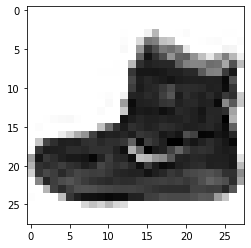

In [5]:
# Show one of the images
img = X_train2.iloc[0]
display_digit(img)

In [6]:
# Create and train the neural network

mlp = MLPClassifier(hidden_layer_sizes = (50,), solver = 'sgd', max_iter = 20, verbose = True, batch_size = 200)

mlp.fit(X_train2, y_train2)

Iteration 1, loss = 5.09749430
Iteration 2, loss = 2.27967655
Iteration 3, loss = 2.26528329
Iteration 4, loss = 2.25191156
Iteration 5, loss = 2.24061995
Iteration 6, loss = 2.19851438
Iteration 7, loss = 2.13305960
Iteration 8, loss = 2.10783112
Iteration 9, loss = 2.08917023
Iteration 10, loss = 2.10318810
Iteration 11, loss = 2.06966528
Iteration 12, loss = 2.06530811
Iteration 13, loss = 2.04591022
Iteration 14, loss = 2.05124940
Iteration 15, loss = 2.04510921
Iteration 16, loss = 1.99601390
Iteration 17, loss = 1.90415640
Iteration 18, loss = 2.00042747
Iteration 19, loss = 1.98161981
Iteration 20, loss = 1.87486291


C:\Users\Johnn\AppData\Roaming\Python\Python310\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20) reached and the optimization hasn't converged yet.
  warnings.warn(


MLPClassifier(batch_size=200, hidden_layer_sizes=(50,), max_iter=20,
              solver='sgd', verbose=True)

The neural network thinks this is a shirt


C:\Users\Johnn\AppData\Roaming\Python\Python310\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPClassifier was fitted with feature names
  warnings.warn(


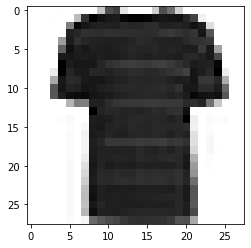

In [7]:
# Dict for converting our predictions into actual words
fashion_dict = {"0" : "T-shirt", 
                "1" : "pair of trousers",
                "2" : "pullover",
                "3" : "dress",
                "4" : "coat",
                "5" : "sandal",
                "6" : "shirt",
                "7" : "sneaker",
                "8" : "bag",
                "9" : "ankle boot"}

# Pick an image from our test set (never seen before by our neural network)
test_img = X_test2.iloc[300]

# Show it to us
display_digit(test_img)

# Change it from a pandas series to a NumPy array (and flip its dimensions)
test_img = test_img.values.reshape(1, -1)

# Ask the neural network what digit this is
prediction = mlp.predict(test_img)
prediction = fashion_dict[prediction[0]]

print("The neural network thinks this is a {}".format(prediction))

Note: You may notice that the predictions are sometimes less accurate on this version. This is because some problems are harder to "learn" than others, and we used the exact same model for both problems. More advanced models can provide better performance.